In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("diabetes.csv") #Loading Dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() # display summary information of te dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe() #Summary Statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Checks Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checks duplicates
df.duplicated().sum()

np.int64(0)

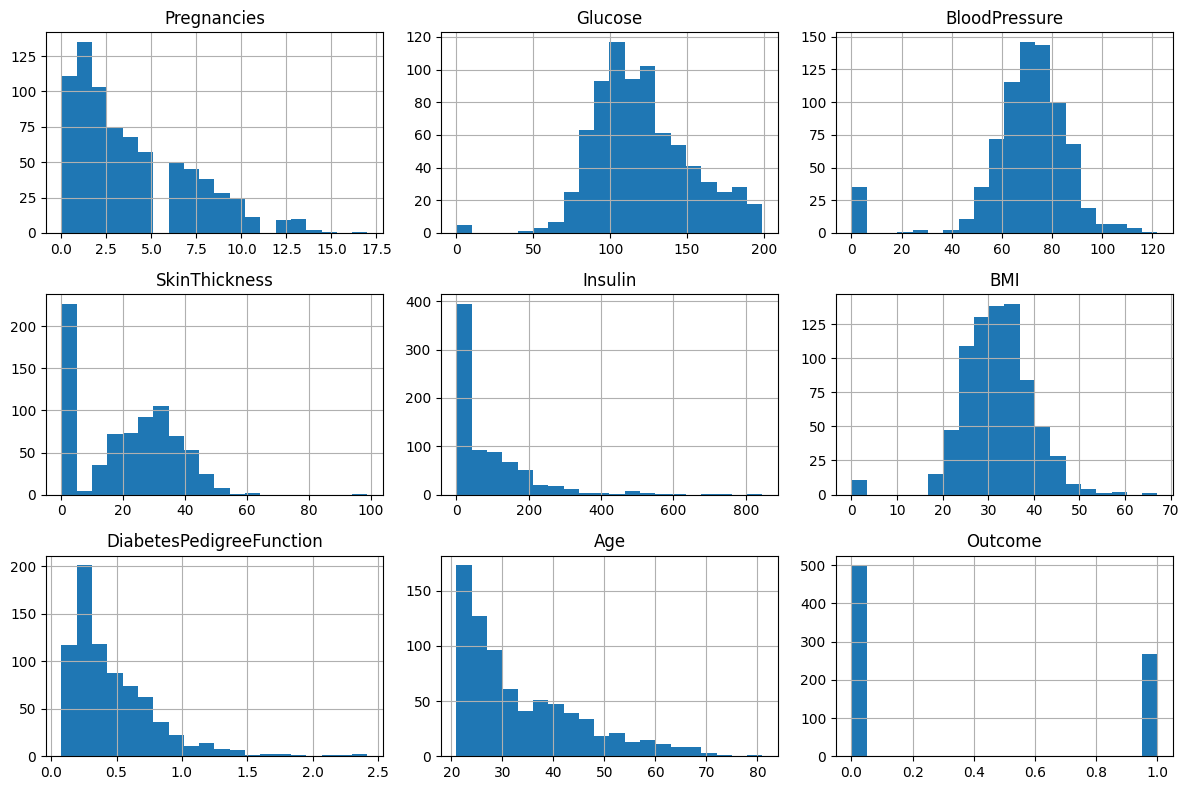

In [8]:
# Histograms
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

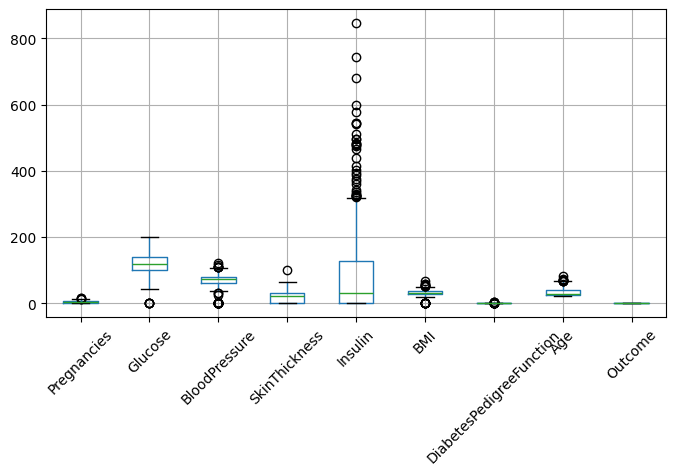

In [9]:
# Boxplots to check the out liers 
plt.figure(figsize=(8,4))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

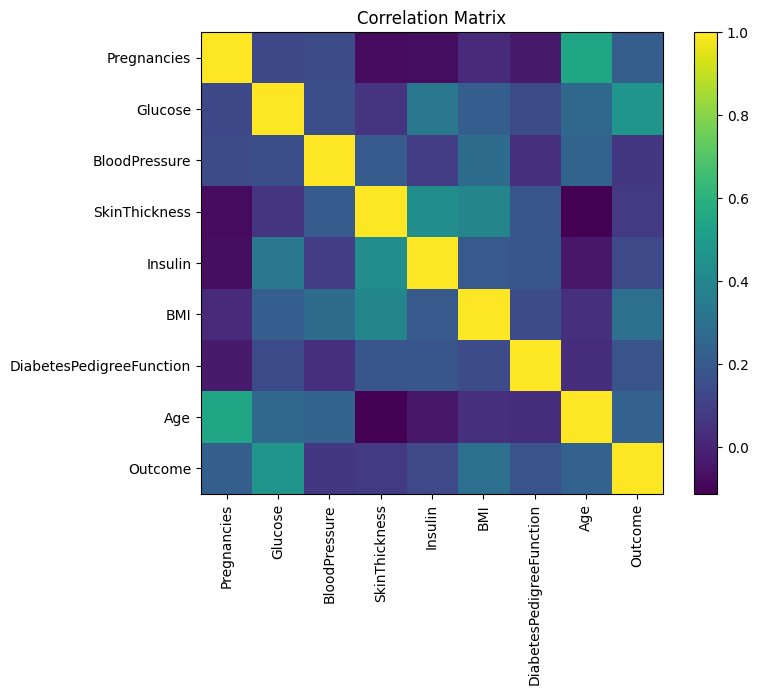

In [10]:
# Correlation Matrix
plt.figure(figsize=(8,6))
corr = df.corr()
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Replacing the Zero Values With NaN
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Replacing missing values with Mean
df.fillna(df.mean(), inplace=True)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#Train-Test Split
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
#Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
#Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC-AUC: 0.8242424242424242


In [18]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



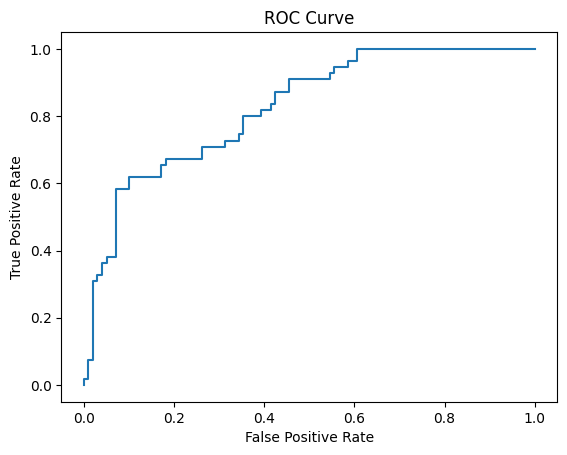

In [19]:
#ROC Curve
fpr, tpr, th = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [20]:
# Logistic Regression Coefficients
coeff = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
})

coeff


,Feature,Coefficient
0,Pregnancies,0.224953
1,Glucose,1.083654
2,BloodPressure,-0.145489
3,SkinThickness,0.068611
4,Insulin,-0.096974
5,BMI,0.679456
6,DiabetesPedigreeFunction,0.199995
7,Age,0.394776


#### a. Interpret the coefficients of the logistic regression model 

In Logistic Regression, the coefficients show how much each feature increases or decreases the log-odds of the positive class (Outcome = 1).

* Positive coefficient → increases the chance of diabetes
* Negative coefficient → decreases the chance

* Glucose has the highest positive coefficient
→ When glucose level increases, the probability of diabetes increases strongly.

* BMI also has a large positive coefficient
→ Higher body mass increases diabetes risk.

* Age and Pregnancies have moderate positive coefficients
→ Older age and higher number of pregnancies slightly increase the probability.

* Blood Pressure has a very small or negative coefficient
→ It does not strongly influence the prediction or may even slightly decrease the probability.

#### b. Discuss the significance of features in predicting the target
* Glucose:-
Most important predictor
Strong correlation with Outcome
Biologically consistent: diabetes is primarily linked with abnormal glucose regulation.

* BMI:-
High BMI → higher risk of diabetes
Indicates obesity which is a well-known factor.

* Age:-
Older individuals tend to have higher chances of developing diabetes.

* Pregnancies:-
More pregnancies increase the chance of gestational diabetes, which is related.

* Diabetes Pedigree Function:-
Measures genetic risk
Higher values indicate family history influence.

* Insulin, SkinThickness:-
Their significance is smaller due to missing or zero entries in the dataset.

* Blood Pressure:-
Least significant feature
Very low influence on the model.

In [21]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
